# Using btrack with napari


In [1]:
import os
import json

import btrack
import napari

import numpy as np
import pandas as pd

from skimage import io
from napari.utils import nbscreenshot

In [2]:
objects = btrack.dataio.import_CSV('napari_example.csv')

In [3]:
objects[0]

,ID,x,y,z,t,dummy,states,label,prob
0,0,517.559509,9.081633,0.0,0,False,0,0,0.0


In [4]:
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

  # configure the tracker using a config file
  tracker.configure_from_file('../models/cell_config.json')

  # append the objects to be tracked
  tracker.append(objects)

  # set the volume (Z axis volume is set very large for 2D data)
  tracker.volume=((0,1600), (0,1200), (-1e5,1e5))

  # track them (in interactive mode)
  tracker.track_interactive(step_size=100)

  # generate hypotheses and run the global optimizer
  tracker.optimize()

  # get the tracks in a format for napari visualization
  data, properties, graph = tracker.to_napari(ndim=2)

[INFO][2020/10/14 11:30:48 AM] Loaded btrack: /home/quantumjot/Dropbox/Code/py3/BayesianTracker/btrack/libs/libtracker.so
[INFO][2020/10/14 11:30:48 AM] btrack (v0.3.13) library imported
[INFO][2020/10/14 11:30:48 AM] Setting max XYZ search radius to: 100
[INFO][2020/10/14 11:30:48 AM] Starting BayesianTracker session
[INFO][2020/10/14 11:30:48 AM] Loading configuration file: ../models/cell_config.json
[INFO][2020/10/14 11:30:48 AM] Loading motion model: b'cell_motion'
[INFO][2020/10/14 11:30:48 AM] Objects are of type: <class 'list'>
[INFO][2020/10/14 11:30:48 AM] Set volume to ((0, 1600), (0, 1200), (-100000.0, 100000.0))
[INFO][2020/10/14 11:30:48 AM] Starting tracking... 
[INFO][2020/10/14 11:30:48 AM] Tracking objects in frames 0 to 99 (of 500)...
[INFO][2020/10/14 11:30:48 AM]  - Timing (Bayesian updates: 1.15ms, Linking: 0.22ms)
[INFO][2020/10/14 11:30:48 AM]  - Probabilities (Link: 1.00000, Lost: 0.48361)
[INFO][2020/10/14 11:30:48 AM]  - Stats (Active: 78, Lost: 191, Conflicts

In [5]:
vertices = data[:, 1:]

In [9]:
stack = io.imread('/media/quantumjot/DataIII/Data/Giulia/GV0800/Pos12/Pos12_aligned.tif')

In [11]:
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(stack)
    viewer.add_points(vertices, size=4, name='points', opacity=0.3)
    viewer.add_tracks(data, properties=properties, graph=graph, name='tracks')

<Tracks layer 'tracks' at 0x7f734b8f5790>

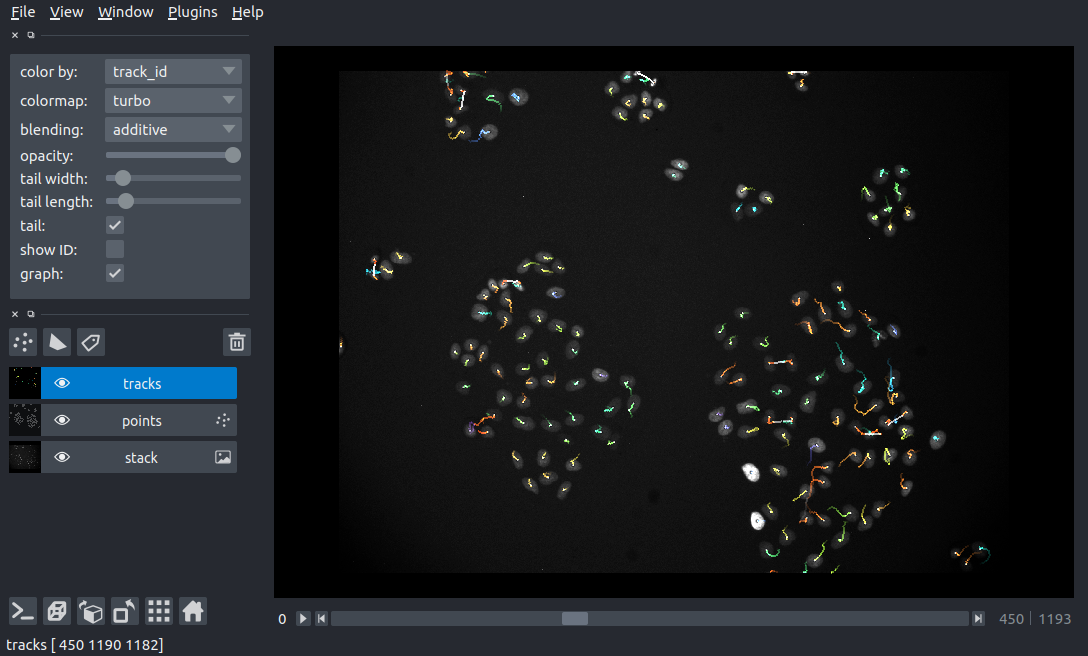

In [13]:
nbscreenshot(viewer)